In [5]:
import pandas

csv = pandas.read_csv("dft_rawcount_local_authority_id_65.csv")

In [6]:
for row in csv.values:
    row
row

array([808654, 'E', 2020, '2020-09-10', 18, 9, 'South East', 65,
       'Hampshire', 'B3400', 'Minor', nan, nan, 446309, 148114, 51.230342,
       -1.3381511, nan, nan, 1, 6, 116, 2, 14, 1, 1, 0, 0, 0, 0, 2, 140],
      dtype=object)

In [7]:
csv.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [8]:
latitude = list(csv.columns).index("latitude")
longitude = list(csv.columns).index("longitude")
latitudes = []
longitudes = []
pairs = []
for row in csv.values:
    lat = float(row[latitude])
    longi = float(row[longitude])
    if not([lat,longi] in pairs):
        latitudes.append(lat)
        longitudes.append(longi)
        pairs.append([lat,longi])

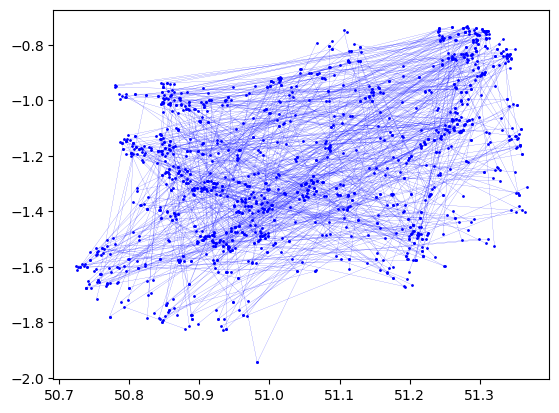

In [9]:
from matplotlib import pyplot as plt
counter = 0
fig, ax = plt.subplots()
for i in range(0,len(latitudes),2):
    x,y = latitudes[i],longitudes[i]
    ax.plot(latitudes[i:i+2], longitudes[i:i+2], 'bo-', linewidth=0.1, markersize=1)
    counter += 1
plt.show()

In [10]:
import numpy as np
def points_from_line(start_point,end_point,distance = 0.1,y_distance = 0.001):
    points = []
    
    start_point,end_point = sorted([start_point,end_point])
    start_point = np.array(start_point)
    end_point = np.array(end_point)
    start_x,start_y = np.array(start_point)
    end_x,end_y = np.array(end_point)
    gradient = (end_y - start_y)/(end_x-start_x)
    distance_between = np.linalg.norm(start_point-end_point)
    
    num_points = round(distance_between/distance)
    
    for i in range(num_points):
        x = start_x + i*distance
        y = start_y + gradient*(i*distance)
        top_point = np.array(x,y) + [0,y_distance]
        bottom_point = np.array(x,y) - [0,y_distance]
        points.append(top_point)
        points.append(bottom_point)
    return points

In [11]:
len(latitudes)

1392

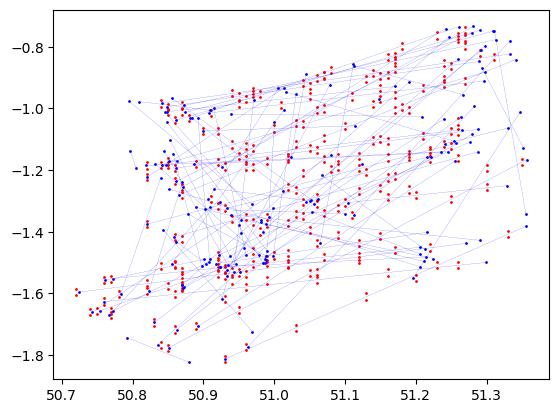

In [17]:
possible = set()
def points_from_line(start_point,end_point,distance = 0.1,y_distance = 0.01):
    points = []
    
    start_point,end_point = sorted([start_point,end_point])
    start_point = np.array(start_point)
    end_point = np.array(end_point)
    start_x,start_y = np.array(start_point)
    end_x,end_y = np.array(end_point)
    gradient = (end_y - start_y)/(end_x-start_x)
    distance_between = np.linalg.norm(start_point-end_point)
    
    num_points = round(distance_between/distance)
    # print(start_x,start_y)
    counter = 0
    while True:
        x = start_x + counter*distance
        y = start_y + gradient*(counter*distance)
        if x > end_x or y > end_y:
            break
        top_point = [round(x,2),round(y+y_distance,3)]
        bottom_point = [round(x,2),round(y-y_distance,3)]
        # print([x,y])
        if not(tuple(top_point) in possible):
            possible.add(tuple(top_point))
            points.append(top_point)
        # else:
        #     print("IN")
        if not(tuple(bottom_point) in possible):
            possible.add(tuple(bottom_point))
            points.append(bottom_point)
        # else:
        #     print("IN")
        # points.append([x,y])
        counter += 1
    return points
from matplotlib import pyplot as plt
counter = 0
fig, ax = plt.subplots()
for i in range(0,200,2):
    x,y = latitudes[i],longitudes[i]
    points = points_from_line([latitudes[i],longitudes[i]],[latitudes[i+1],longitudes[i+1]])
    for point in points:
        ax.scatter(point[0],point[1],s=1,c="red")
    ax.plot(latitudes[i:i+2], longitudes[i:i+2], 'bo-', linewidth=0.1, markersize=1)
    
    counter += 1

In [11]:
len(possible)

2461

KeyboardInterrupt: 

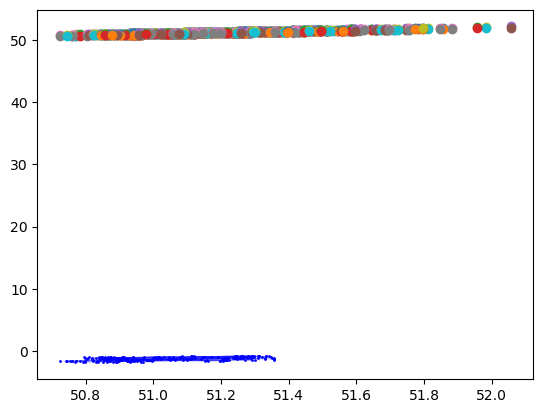

In [39]:
from matplotlib import pyplot as plt
counter = 0
fig, ax = plt.subplots()
for i in range(0,len(latitudes),2):
    print(i)
    x,y = latitudes[i],longitudes[i]
    start_point = [latitudes[i],longitudes[i]]
    end_point = [latitudes[i+1],longitudes[i+1]]
    points = points_from_line(start_point,end_point)
    for point in points:
        ax.scatter(point[0],point[1])
    ax.plot(latitudes[i:i+2], longitudes[i:i+2], 'bo-', linewidth=0.1, markersize=1)
    
    counter += 1
plt.show()

In [ ]:
top_left = [min(latitudes),max(longitudes)]
top_left

[50.72413402, -0.73349507]

In [ ]:
from geopy.geocoders import ArcGIS
nom=ArcGIS()
lati,longi = nom.geocode("hampshire")[-1]

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import random

#creating random data
df = pd.DataFrame({'lat':latitudes,
       'lon':longitudes, 
       "color":["red" for i in range(len(latitudes))]})

fig = px.scatter_mapbox(df, 
                        lat='lat',
                        lon='lon',
                        center={'lat':lati,
                                'lon':longi},
                        )




fig.update_layout(mapbox_style='open-street-map')
# fig = fig.update_traces(marker_line_width=0.1)

fig.show()

In [ ]:
fig

In [ ]:
np.ones(len(latitudes))

array([1., 1., 1., ..., 1., 1., 1.])